In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests   
import shutil      
import datetime
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import os
import winsound
os.chdir('C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Sports\\NBA_Prediction_V3_1')
import warnings
warnings.filterwarnings('ignore')

from selenium.common.exceptions import WebDriverException
import random


In [2]:
files = os.listdir('C:\\Users\\Travis\\Downloads')
files = [i for i in files if '22-23-season' in i]
files

['22-23-season', '22-23-season.zip']

In [3]:
# delete all 'files'
for file in files:
    try:
        os.remove('C:\\Users\\Travis\\Downloads\\' + file)
    except:
        # rename
        n = random.randint(1, 100000)
        new_filename = 'just_delete_me_' + str(n)
        os.rename('C:\\Users\\Travis\\Downloads\\' + file, 'C:\\Users\\Travis\\Downloads\\' + new_filename)
        pass

In [4]:
# Check if updating is necessary
today = datetime.datetime.today()
yesterday = today - datetime.timedelta(days=1)

today = today.strftime('%m-%d-%Y')
yesterday = yesterday.strftime('%m-%d-%Y')

name_should_be = '[10-18-2022]-['+ str(yesterday) + ']-combined-stats.csv]'

folder = os.listdir('data/team/PbP')

if name_should_be not in folder:
    # if no driver is open, open one
    driver = None
    if driver is None:
        driver = webdriver.Chrome()
    url = 'https://www.bigdataball.com/my-account/'
    driver.get(url)

    user_nm = os.environ.get('PRIMARY_EMAIL')

    # add user name
    username = '/html/body/div/div/div/div/article/div/div/div/form/p[1]/input'
    driver.find_element_by_xpath(username).send_keys(user_nm)

    passw = os.environ.get('COMMON_PWORD')

    pword = '/html/body/div/div/div/div/article/div/div/div/form/p[2]/span/input'
    driver.find_element_by_xpath(pword).send_keys(passw)

    # click login
    login = '/html/body/div/div/div/div/article/div/div/div/form/p[3]/button'
    driver.find_element_by_xpath(login).click()

    url = 'https://www.bigdataball.com/nba-stats-central/'

    driver.get(url)
    # scroll down page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(8)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # find all downloads
    downloads = soup.find_all('div', class_='file-container')
    # find the one we want
    for i in downloads:
        if '22-23-season.zip' in i.text:
            link = i.find('a')['href']
            # download the file by clicking link
            driver.get(link)
            time.sleep(5)

    # close driver
    driver.close()

In [5]:
# get list of files in downloads
files = os.listdir('C:\\Users\\Travis\\Downloads')
files = [i for i in files if '22-23-season' in i]
files = [i for i in files if '.zip' in i]
files

['22-23-season.zip']

In [6]:
# now the new file is downloaded.
# unzip the file
import zipfile
# file is in 'C:\\Users\\Travis\\Downloads
# unzip the file
with zipfile.ZipFile('C:\\Users\\Travis\\Downloads\\22-23-season.zip', 'r') as zip_ref:
    zip_ref.extractall('C:\\Users\\Travis\\Downloads\\22-23-season')

# get the file we are looking for
folder = os.listdir('C:\\Users\\Travis\\Downloads\\22-23-season')
for i in folder:
    if 'combined-stats.csv' in i:
        file = i

        # open file
df = pd.read_csv('C:\\Users\\Travis\\Downloads\\22-23-season\\' + file)
df

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description
0,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN
1,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Horford vs. Embiid: Tip to Harris
2,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,missed,NaN,turnaround fadeaway,13.0,-118.0,50.0,36.8,10.0,Brown BLOCK (1 BLK): MISS Embiid 13' Turnaroun...
3,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,rebound offensive,NaN,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:1 Def:0)
4,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,out of bounds lost ball,NaN,NaN,out of bounds lost ball,NaN,NaN,NaN,NaN,NaN,Tucker Out of Bounds Lost Ball Turnover (P1.T1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331722,22200705,2022-23 Regular Season,2023-01-22,Dennis Schroder,LeBron James,Troy Brown Jr.,Patrick Beverley,Thomas Bryant,Damian Lillard,Jerami Grant,...,NaN,made,NaN,free throw 1/2,NaN,NaN,NaN,NaN,NaN,Schroder Free Throw 1 of 2 (23 PTS)
331723,22200705,2022-23 Regular Season,2023-01-22,Dennis Schroder,LeBron James,Troy Brown Jr.,Patrick Beverley,Thomas Bryant,Damian Lillard,Jerami Grant,...,NaN,made,NaN,free throw 2/2,NaN,NaN,NaN,NaN,NaN,Schroder Free Throw 2 of 2 (24 PTS)
331724,22200705,2022-23 Regular Season,2023-01-22,Dennis Schroder,LeBron James,Troy Brown Jr.,Patrick Beverley,Thomas Bryant,Damian Lillard,Jerami Grant,...,NaN,missed,NaN,3pt pullup jump shot,29.0,-21.0,285.0,22.9,60.5,MISS Lillard 29' 3PT Pullup Jump Shot
331725,22200705,2022-23 Regular Season,2023-01-22,Dennis Schroder,LeBron James,Troy Brown Jr.,Patrick Beverley,Thomas Bryant,Damian Lillard,Jerami Grant,...,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,James REBOUND (Off:0 Def:11)


In [7]:
folder = os.listdir('C:\\Users\\Travis\\Downloads\\22-23-season')
file_list = []
for i in folder:
    if 'combined-stats.csv' not in i:
        file_list.append(i)


file_list = pd.DataFrame(file_list)

# split by - 
file_list['date'] = file_list[0].str.split(']').str[0]
file_list['date'] = file_list['date'].str.split('[').str[1]
file_list['game_id'] = file_list[0].str.split('-').str[3]
file_list['matchup'] = file_list[0].str.split('-').str[4].str.split('.').str[0]

file_list


,0,date,game_id,matchup
0,[2022-10-18]-0022200001-PHI@BOS.csv,2022-10-18,0022200001,PHI@BOS
1,[2022-10-18]-0022200002-LAL@GSW.csv,2022-10-18,0022200002,LAL@GSW
2,[2022-10-19]-0022200003-ORL@DET.csv,2022-10-19,0022200003,ORL@DET
3,[2022-10-19]-0022200004-WAS@IND.csv,2022-10-19,0022200004,WAS@IND
4,[2022-10-19]-0022200005-HOU@ATL.csv,2022-10-19,0022200005,HOU@ATL
...,...,...,...,...
700,[2023-01-22]-0022200701-LAC@DAL.csv,2023-01-22,0022200701,LAC@DAL
701,[2023-01-22]-0022200702-OKC@DEN.csv,2023-01-22,0022200702,OKC@DEN
702,[2023-01-22]-0022200703-MEM@PHX.csv,2023-01-22,0022200703,MEM@PHX
703,[2023-01-22]-0022200704-BKN@GSW.csv,2023-01-22,0022200704,BKN@GSW


In [8]:
# drop the first two 0s in game_id
file_list['game_id'] = file_list['game_id'].str[2:]

In [9]:
file_list

,0,date,game_id,matchup
0,[2022-10-18]-0022200001-PHI@BOS.csv,2022-10-18,22200001,PHI@BOS
1,[2022-10-18]-0022200002-LAL@GSW.csv,2022-10-18,22200002,LAL@GSW
2,[2022-10-19]-0022200003-ORL@DET.csv,2022-10-19,22200003,ORL@DET
3,[2022-10-19]-0022200004-WAS@IND.csv,2022-10-19,22200004,WAS@IND
4,[2022-10-19]-0022200005-HOU@ATL.csv,2022-10-19,22200005,HOU@ATL
...,...,...,...,...
700,[2023-01-22]-0022200701-LAC@DAL.csv,2023-01-22,22200701,LAC@DAL
701,[2023-01-22]-0022200702-OKC@DEN.csv,2023-01-22,22200702,OKC@DEN
702,[2023-01-22]-0022200703-MEM@PHX.csv,2023-01-22,22200703,MEM@PHX
703,[2023-01-22]-0022200704-BKN@GSW.csv,2023-01-22,22200704,BKN@GSW


In [10]:
file_list.to_csv('data/team/aggregates/file_list_22-23.csv', index=False)

In [11]:
# make dict of game_id and matchup
game_dict = dict(zip(file_list['game_id'], file_list['matchup']))
game_dict

{'22200001': 'PHI@BOS',
 '22200002': 'LAL@GSW',
 '22200003': 'ORL@DET',
 '22200004': 'WAS@IND',
 '22200005': 'HOU@ATL',
 '22200006': 'NOP@BKN',
 '22200007': 'CHI@MIA',
 '22200008': 'CLE@TOR',
 '22200009': 'NYK@MEM',
 '22200010': 'OKC@MIN',
 '22200011': 'CHA@SAS',
 '22200012': 'DEN@UTA',
 '22200013': 'DAL@PHX',
 '22200014': 'POR@SAC',
 '22200015': 'MIL@PHI',
 '22200016': 'LAC@LAL',
 '22200017': 'NOP@CHA',
 '22200018': 'SAS@IND',
 '22200019': 'CHI@WAS',
 '22200020': 'ORL@ATL',
 '22200021': 'TOR@BKN',
 '22200022': 'BOS@MIA',
 '22200023': 'DET@NYK',
 '22200024': 'MEM@HOU',
 '22200025': 'UTA@MIN',
 '22200026': 'DEN@GSW',
 '22200027': 'PHX@POR',
 '22200028': 'SAS@PHI',
 '22200029': 'DET@IND',
 '22200030': 'BOS@ORL',
 '22200031': 'TOR@MIA',
 '22200032': 'CLE@CHI',
 '22200033': 'HOU@MIL',
 '22200034': 'MEM@DAL',
 '22200035': 'OKC@DEN',
 '22200036': 'LAC@SAC',
 '22200037': 'POR@LAL',
 '22200038': 'CHA@ATL',
 '22200039': 'WAS@CLE',
 '22200040': 'UTA@NOP',
 '22200041': 'MIN@OKC',
 '22200042': 'SA

In [12]:
df['game_id']= df['game_id'].astype(str)

In [13]:
df['matchup']= df['game_id'].map(game_dict)

In [14]:
# check nan
df['matchup'].isna().sum()

0

In [15]:
df.columns

Index(['game_id', 'data_set', 'date', 'a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2',
       'h3', 'h4', 'h5', 'period', 'away_score', 'home_score',
       'remaining_time', 'elapsed', 'play_length', 'play_id', 'team',
       'event_type', 'assist', 'away', 'home', 'block', 'entered', 'left',
       'num', 'opponent', 'outof', 'player', 'points', 'possession', 'reason',
       'result', 'steal', 'type', 'shot_distance', 'original_x', 'original_y',
       'converted_x', 'converted_y', 'description', 'matchup'],
      dtype='object')

In [16]:
today = datetime.datetime.today()
today = today.strftime('%m-%d-%Y')

In [17]:
df.to_csv('data/team/aggregates/daily_updates/PbP_22-23_'+ today +'.csv', index=False)

### How to Sum Stats

In [18]:
df = pd.read_csv('data/team/aggregates/daily_updates/PbP_22-23_'+ today + '.csv')

In [19]:
df.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,matchup
0,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,PHI@BOS
1,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Horford vs. Embiid: Tip to Harris,PHI@BOS
2,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,missed,NaN,turnaround fadeaway,13.0,-118.0,50.0,36.8,10.0,Brown BLOCK (1 BLK): MISS Embiid 13' Turnaroun...,PHI@BOS
3,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,rebound offensive,NaN,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:1 Def:0),PHI@BOS
4,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,out of bounds lost ball,NaN,NaN,NaN,NaN,NaN,Tucker Out of Bounds Lost Ball Turnover (P1.T1),PHI@BOS


In [20]:
df['Away_score_diff'] = df['away_score'] - df['home_score']
df['Home_score_diff'] = df['home_score'] - df['away_score']
df['Away_Team'] = df['matchup'].str.split('@').str[0]
df['Home_Team'] = df['matchup'].str.split('@').str[1]

### Better Clutch Stats

In [21]:
# view remaining_time, elapsed, and play_length
df[['remaining_time', 'elapsed', 'play_length']]

,remaining_time,elapsed,play_length
0,0:12:00,0:00:00,0:00:00
1,0:12:00,0:00:00,0:00:00
2,0:11:38,0:00:22,0:00:22
3,0:11:35,0:00:25,0:00:03
4,0:11:35,0:00:25,0:00:00
...,...,...,...
331722,0:00:30,0:11:30,0:00:00
331723,0:00:30,0:11:30,0:00:00
331724,0:00:24,0:11:36,0:00:06
331725,0:00:21,0:11:39,0:00:03


In [22]:
# drop the hour from remaining_time, elapsed, and play_length
df['remaining_time'] = df['remaining_time'].str.split(':').str[1]
df['elapsed'] = df['elapsed'].str.split(':').str[1]
df['play_length'] = df['play_length'].str.split(':').str[1]
df.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,original_x,original_y,converted_x,converted_y,description,matchup,Away_score_diff,Home_score_diff,Away_Team,Home_Team
0,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,NaN,PHI@BOS,0,0,PHI,BOS
1,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Jump Ball Horford vs. Embiid: Tip to Harris,PHI@BOS,0,0,PHI,BOS
2,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,-118.0,50.0,36.8,10.0,Brown BLOCK (1 BLK): MISS Embiid 13' Turnaroun...,PHI@BOS,0,0,PHI,BOS
3,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:1 Def:0),PHI@BOS,0,0,PHI,BOS
4,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker Out of Bounds Lost Ball Turnover (P1.T1),PHI@BOS,0,0,PHI,BOS


In [23]:
# convert inf to 0
df['play_length'] = df['play_length'].replace('inf', 0)
df['remaining_time'] = df['remaining_time'].replace('inf', 0)
df['elapsed'] = df['elapsed'].replace('inf', 0)

In [24]:
# fill na with 0 for remaining_time, elapsed, and play_length
df['remaining_time'] = df['remaining_time'].fillna(0)
df['elapsed'] = df['elapsed'].fillna(0)
df['play_length'] = df['play_length'].fillna(0)

In [25]:
# view nan or inf in remaining_time
df['remaining_time'].isna().sum()

0

In [26]:
# turn remaining_time into seconds
df['remaining_time_min'] = df['remaining_time'].str.split(':').str[0]
# nan to 0
df['remaining_time_min'] = df['remaining_time_min'].fillna(0)
df['remaining_time_sec'] = df['remaining_time'].str.split(':').str[1]
# nan to 0
df['remaining_time_sec'] = df['remaining_time_sec'].fillna(0)
df['remaining_time'] = df['remaining_time_min'].astype(int) * 60 + df['remaining_time_sec'].astype(int)

# turn elapsed into seconds
df['elapsed_min'] = df['elapsed'].str.split(':').str[0]
# nan to 0
df['elapsed_min'] = df['elapsed_min'].fillna(0)
df['elapsed_sec'] = df['elapsed'].str.split(':').str[1]
# nan to 0
df['elapsed_sec'] = df['elapsed_sec'].fillna(0)
df['elapsed'] = df['elapsed_min'].astype(int) * 60 + df['elapsed_sec'].astype(int)

# turn play_length into seconds
df['play_length_min'] = df['play_length'].str.split(':').str[0]
# nan to 0
df['play_length_min'] = df['play_length_min'].fillna(0)
df['play_length_sec'] = df['play_length'].str.split(':').str[1]
# nan to 0
df['play_length_sec'] = df['play_length_sec'].fillna(0)
df['play_length'] = df['play_length_min'].astype(int) * 60 + df['play_length_sec'].astype(int)

# drop the min and sec columns
df = df.drop(['remaining_time_min', 'remaining_time_sec', 'elapsed_min', 'elapsed_sec', 'play_length_min', 'play_length_sec'], axis=1)
df.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,original_x,original_y,converted_x,converted_y,description,matchup,Away_score_diff,Home_score_diff,Away_Team,Home_Team
0,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,NaN,PHI@BOS,0,0,PHI,BOS
1,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Jump Ball Horford vs. Embiid: Tip to Harris,PHI@BOS,0,0,PHI,BOS
2,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,-118.0,50.0,36.8,10.0,Brown BLOCK (1 BLK): MISS Embiid 13' Turnaroun...,PHI@BOS,0,0,PHI,BOS
3,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:1 Def:0),PHI@BOS,0,0,PHI,BOS
4,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker Out of Bounds Lost Ball Turnover (P1.T1),PHI@BOS,0,0,PHI,BOS


In [27]:
# TODO: better clutch... not just 5 points. Make it 9 points or less in the last 6 minutes of the 4th quarter. 
team = 'POR'
team_clutch  = df[(df['Away_Team'] == team) | (df['Home_Team'] == team)]
team_clutch = team_clutch[(team_clutch['period'] == 4) & (team_clutch['remaining_time'] <= (6*60))]
team_clutch = team_clutch[(team_clutch['Away_score_diff'] <= 9) | (team_clutch['Home_score_diff'] <= 9)]
print(team_clutch.shape)
team_clutch.head(3)

(3367, 49)


,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,original_x,original_y,converted_x,converted_y,description,matchup,Away_score_diff,Home_score_diff,Away_Team,Home_Team
6844,22200014,2022-23 Regular Season,2022-10-19,Justise Winslow,Shaedon Sharpe,Damian Lillard,Josh Hart,Jusuf Nurkic,Terence Davis,Trey Lyles,...,208.0,-15.0,4.2,3.5,MISS Sharpe 21' Pullup Jump Shot,POR@SAC,1,-1,POR,SAC
6845,22200014,2022-23 Regular Season,2022-10-19,Justise Winslow,Shaedon Sharpe,Damian Lillard,Josh Hart,Jusuf Nurkic,Terence Davis,Trey Lyles,...,NaN,NaN,NaN,NaN,Lillard REBOUND (Off:3 Def:1),POR@SAC,1,-1,POR,SAC
6846,22200014,2022-23 Regular Season,2022-10-19,Justise Winslow,Shaedon Sharpe,Damian Lillard,Josh Hart,Jusuf Nurkic,Terence Davis,Trey Lyles,...,-5.0,0.0,25.5,5.0,Lillard 1' Reverse Layup (17 PTS),POR@SAC,3,-3,POR,SAC


In [28]:
total_time = team_clutch.groupby(['game_id'])['play_length'].sum().reset_index()
total_time

,game_id,play_length
0,22200014,0
1,22200027,0
2,22200037,0
3,22200051,0
4,22200065,0
5,22200080,0
6,22200116,0
7,22200130,0
8,22200139,0
9,22200150,0


In [29]:
# sum points scored by each team in each game_id
points = team_clutch[team_clutch['team'] == 'POR'].groupby(['game_id'])['points'].sum().reset_index()
opp_points = team_clutch[team_clutch['team'] != 'POR'].groupby(['game_id'])['points'].sum().reset_index()
total_time = team_clutch.groupby(['game_id'])['play_length'].sum().reset_index()
points = points.merge(opp_points, on='game_id', how='left')
points.columns = ['game_id', 'POR_points', 'opp_points']
points['net_points'] = points['POR_points'] - points['opp_points']
points = points.merge(total_time, on='game_id', how='left')
points

,game_id,POR_points,opp_points,net_points,play_length
0,22200014,23.0,17.0,6.0,0
1,22200027,13.0,14.0,-1.0,0
2,22200037,20.0,13.0,7.0,0
3,22200051,24.0,14.0,10.0,0
4,22200065,11.0,11.0,0.0,0
5,22200080,18.0,13.0,5.0,0
6,22200116,27.0,17.0,10.0,0
7,22200130,13.0,14.0,-1.0,0
8,22200139,17.0,8.0,9.0,0
9,22200150,26.0,16.0,10.0,0


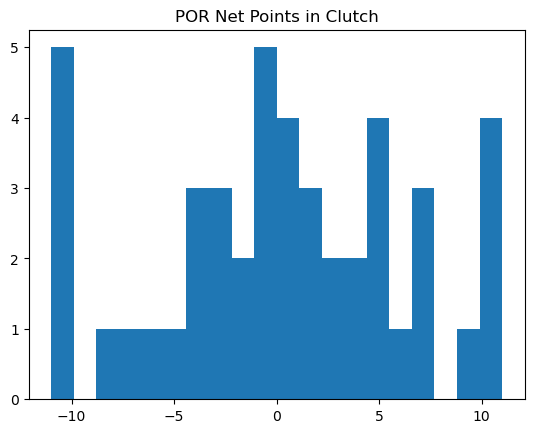

In [30]:
# plot histogram of net points in clutch
plt.hist(points['net_points'], bins=20)
plt.title('POR Net Points in Clutch')
plt.show()

In [31]:
# harden posessions are posessoins where "James Harden" is in a1, a2, a3, a4, a5, h1, h2, h3, h4, or h5. 
harden_pos = df[df['a1'].str.contains('James Harden') | df['a2'].str.contains('James Harden') | df['a3'].str.contains('James Harden') | df['a4'].str.contains('James Harden') | df['a5'].str.contains('James Harden') | df['h1'].str.contains('James Harden') | df['h2'].str.contains('James Harden') | df['h3'].str.contains('James Harden') | df['h4'].str.contains('James Harden') | df['h5'].str.contains('James Harden')]
harden_pos

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,original_x,original_y,converted_x,converted_y,description,matchup,Away_score_diff,Home_score_diff,Away_Team,Home_Team
0,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,NaN,PHI@BOS,0,0,PHI,BOS
1,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Jump Ball Horford vs. Embiid: Tip to Harris,PHI@BOS,0,0,PHI,BOS
2,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,-118.0,50.0,36.8,10.0,Brown BLOCK (1 BLK): MISS Embiid 13' Turnaroun...,PHI@BOS,0,0,PHI,BOS
3,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:1 Def:0),PHI@BOS,0,0,PHI,BOS
4,22200001,2022-23 Regular Season,2022-10-18,Joel Embiid,Tobias Harris,P.J. Tucker,Tyrese Maxey,James Harden,Al Horford,Jaylen Brown,...,NaN,NaN,NaN,NaN,Tucker Out of Bounds Lost Ball Turnover (P1.T1),PHI@BOS,0,0,PHI,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321115,22200682,2022-23 Regular Season,2023-01-19,Joel Embiid,De'Anthony Melton,Tobias Harris,James Harden,Tyrese Maxey,Anfernee Simons,Jerami Grant,...,NaN,NaN,NaN,NaN,Melton REBOUND (Off:0 Def:3),PHI@POR,10,-10,PHI,POR
321116,22200682,2022-23 Regular Season,2023-01-19,Joel Embiid,De'Anthony Melton,Tobias Harris,James Harden,Tyrese Maxey,Anfernee Simons,Jerami Grant,...,NaN,NaN,NaN,NaN,76ers Turnover: Shot Clock (T#15),PHI@POR,10,-10,PHI,POR
321117,22200682,2022-23 Regular Season,2023-01-19,Joel Embiid,De'Anthony Melton,Tobias Harris,James Harden,Tyrese Maxey,Anfernee Simons,Jerami Grant,...,163.0,232.0,41.3,65.8,MISS Grant 28' 3PT Pullup Jump Shot,PHI@POR,10,-10,PHI,POR
321118,22200682,2022-23 Regular Season,2023-01-19,Joel Embiid,De'Anthony Melton,Tobias Harris,James Harden,Tyrese Maxey,Anfernee Simons,Jerami Grant,...,NaN,NaN,NaN,NaN,Harden REBOUND (Off:0 Def:10),PHI@POR,10,-10,PHI,POR


In [32]:
harden_ppg = df[df['player']=='James Harden']
harden_ppg = harden_ppg[['game_id', 'matchup', 'player', 'points']]
harden_ppg = harden_ppg.dropna(subset= ['points'])
harden_ppg['points'] = harden_ppg['points'].astype(int)
harden_ppg = harden_ppg.groupby('game_id').sum()
harden_ppg


,points
game_id,
22200001,35
22200015,31
22200028,12
22200044,29
22200059,18
22200073,11
22200084,15
22200097,23
22200108,24
